In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

# Fundamentos

In [3]:
# Configuración de Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

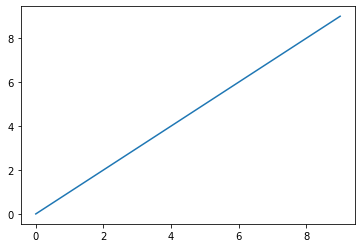

In [4]:
# Tu primer gráfico
data = np.arange(10)
data
foo = plt.plot(data) # plot() muestra la gráfica

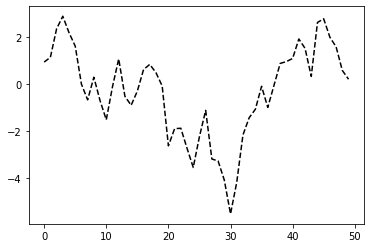

In [5]:
# Hagamos algo más complejo
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [6]:
# plot() modifica la última figura creada.
# Es una buena pŕactica tener todo los gráficos en una celda
foo

## Figuras y Subplots

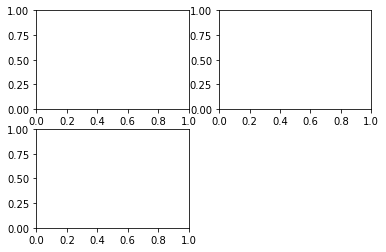

In [7]:
# Crea un figura vacía
fig = plt.figure()
# Añade y selecciona subgráficos a la figura
ax1 = fig.add_subplot(2, 2, 1) # 2x2 = 4 gráficos, elige el número uno...
ax2 = fig.add_subplot(2, 2, 2) # luego el segundo...
ax3 = fig.add_subplot(2, 2, 3) # y el tercero

Nota: Si manejaramos el código por celdas, el resultado no es el mismo

In [8]:
# Graficamos en uno de los subplots de figure.
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  0.,  0.,  5.,  2., 10.,  4., 15., 14., 15.,  6., 11., 10.,
         2.,  2.,  0.,  0.,  2.,  0.,  1.]),
 array([-2.61167255, -2.33229919, -2.05292583, -1.77355247, -1.49417911,
        -1.21480575, -0.93543239, -0.65605903, -0.37668567, -0.09731231,
         0.18206105,  0.46143441,  0.74080777,  1.02018113,  1.29955449,
         1.57892785,  1.85830121,  2.13767457,  2.41704793,  2.69642129,
         2.97579465]),
 <a list of 20 Patch objects>)

In [9]:
# Podemos evitar el contenido basura con "_="
_ = ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

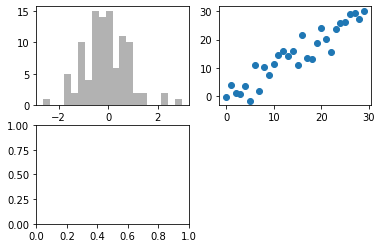

In [10]:
# Este es el resultado
fig

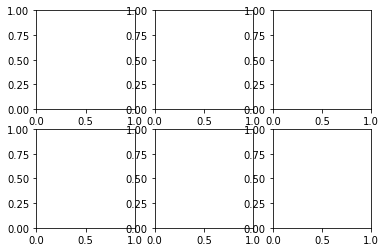

In [11]:
# Es más fácil crear una figura con gráficos así
fig, axes = plt.subplots(2, 3)

In [12]:
# Referencias a los gráficos
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85429b4d68>,
      dtype=object)

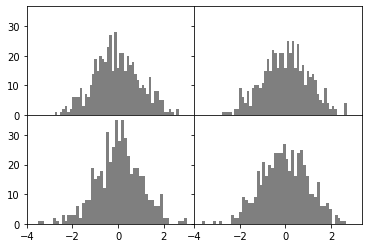

In [13]:
# Podemos iterar sobre las gráficas de una figura
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        _ = axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

# Limitamos el espaciado entre gráficos (% del tamaño del gráfico)
plt.subplots_adjust(wspace=0, hspace=0)

## Marcadores, colores y estilos

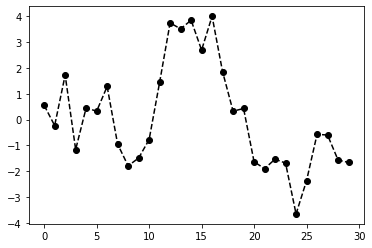

In [14]:
# Los marcadores señalan los puntos de datos reales
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--') # o indica el tipo de marcador

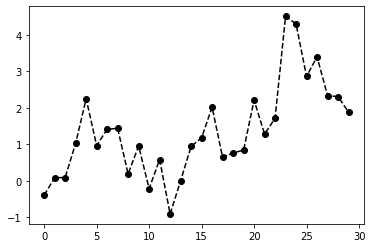

In [15]:
# Este es una forma más explítica
plt.plot(randn(30).cumsum(), color='k', linestyle='--', marker='o')

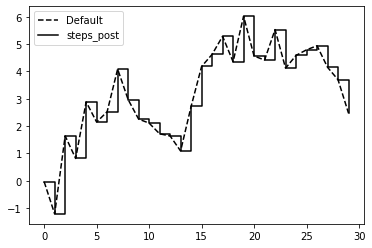

In [16]:
# ¿Curvas suaves o escalones marcados?
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default') # 
plt.plot(data, 'k-', drawstyle='steps-post', label='steps_post')
# legend() coloca un cuadro de leyendas en el gráfico
# No funciona si las leyendas se definen en celdas separadas
plt.legend(loc='best')

## Ticks, etiquetas y leyendas

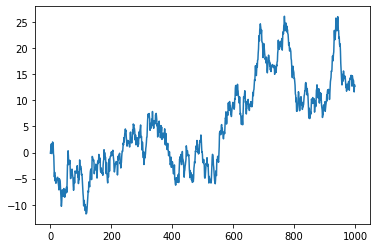

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 1, 'My first MPL plot')

Text(0.5, 3.1999999999999993, 'Stages')

Text(3.200000000000003, 0.5, 'Score')

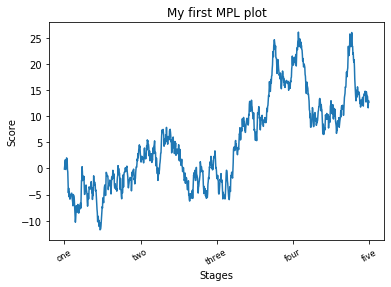

In [18]:
# Cambiamos los ticks de los ejes
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
# Añadimos un título
ax.set_title('My first MPL plot')
# Cambiamos los nombres de los ejes
ax.set_xlabel('Stages')
ax.set_ylabel('Score')
fig

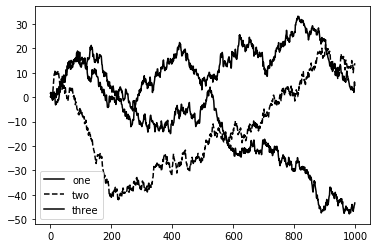

In [19]:
# Leyendas
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# Pasamos las leyendas de cada gráfico (opción label)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k', label='three')
# loc define el lugar donde estarán las leyendas
ax.legend(loc='best') # puede usarse plt.legend()

Text(2007-10-11 00:00:00, 1779.41, 'Peak of bull market')

Text(2008-03-12 00:00:00, 1533.77, 'Bear Stearns Fails')

Text(2009-09-15 00:00:00, 1277.63, 'Lehman Bankruptcy')

(732677.0, 734138.0)

(600, 1800)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

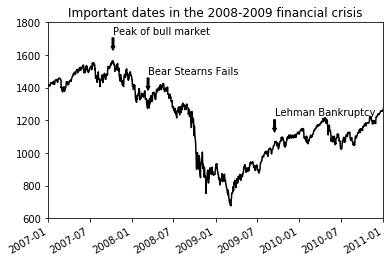

In [20]:
# ANOTACIONES PERSONALIZADAS: TEXTO, DIBUJOS, etc
# Ejemplo de texto: ax.text(x, y, 'Message', family='font', fontsize=9)

from datetime import datetime

fig = plt.figure() # --> Figure
ax = fig.add_subplot(1, 1, 1) # -->Subplot

# Cargamos y seleccionamos datos
data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

# Series tiene una función plot() que se apoya en MPL
spx.plot(ax=ax, style='k-') #-->AxesSubplot, muestra el gráfico

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2009, 9, 15), 'Lehman Bankruptcy'),
]

# Anotamos cada fechas importante con annotate()
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4,
                              width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

# Hacamos zoom a un lugar en la gráfica (establecemos límites)
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

# Visualización con Pandas y Seaborn

## Gráficos de Línea

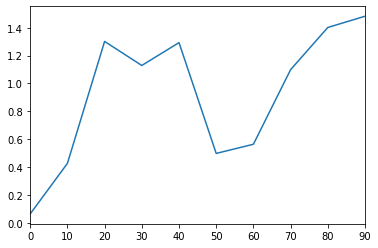

In [21]:
# Series es pasado a MPL 
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

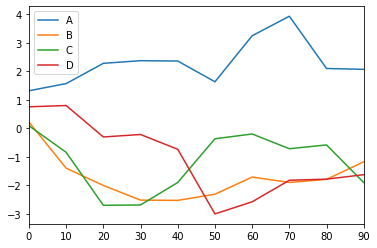

In [22]:
# Igual podemos graficar las columnas de un DF
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
# ¡Tiene autoetiquetado!
df.plot()

## Gráficos de barras

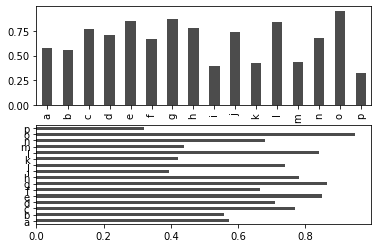

In [23]:
# Creamos gráficas
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# Barras horizontales... (nótese el plot.bar())
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
# y verticales
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

Genus,A,B,C,D
one,0.628130,0.471751,0.500766,0.346670
two,0.381569,0.099408,0.095138,0.757216
three,0.759660,0.879619,0.516271,0.195829
four,0.705409,0.716691,0.773628,0.857433
five,0.070566,0.706762,0.905734,0.382095
six,0.035057,0.449237,0.733928,0.314154


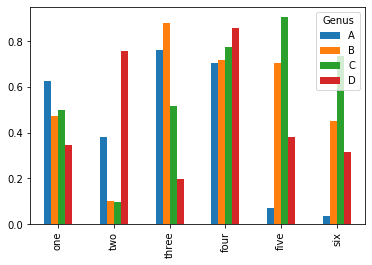

In [24]:
# En un DF, se grafican las barras por fila
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar() # Nombre del eje de columnas se usa como leyenda

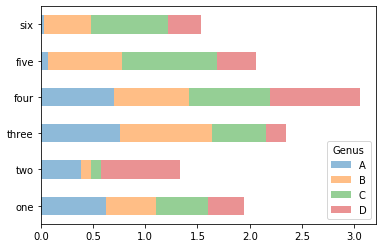

In [25]:
# Barras apiladas
df.plot.barh(stacked=True, alpha=0.5)

0     8
1     8
2     1
3     6
4     5
5     9
6     3
7     5
8     5
9     8
10    4
11    4
12    4
13    9
14    1
dtype: int64

8    3
5    3
4    3
9    2
1    2
6    1
3    1
dtype: int64

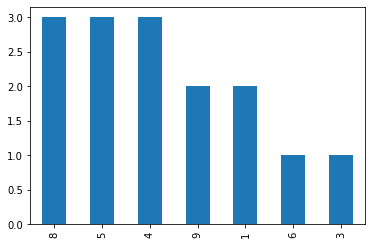

In [26]:
# Uso común: Frecuencias de valores
s = pd.Series(np.random.randint(1, 10, 15))
s
s.value_counts()
s.value_counts().plot.bar()

In [27]:
# UN EJEMPLO
# ¿Qué tan grandes son los grupos de personas que asisten a un restaurante?
tips = pd.read_csv('../examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [28]:
# Recortemos el problema: Grupos de 2 a 5 personas
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [29]:
# Normalizamos (expresamos valores como % del total)
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


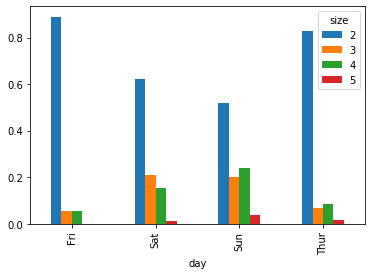

In [30]:
# Graficamos
party_pcts.plot.bar()

In [31]:
# Utilizemos SEABORN
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


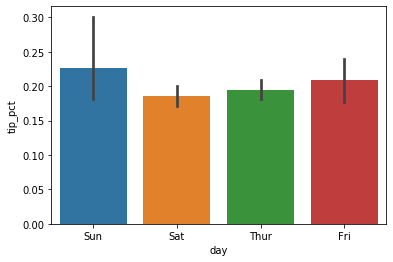

In [32]:
# Gráfico de barras (x, y son nombre de cols, data es un DF)
# Las líneas grises representan un intervalo de confianza del 95%
sns.barplot(x='day', y='tip_pct', data=tips, orient='v')

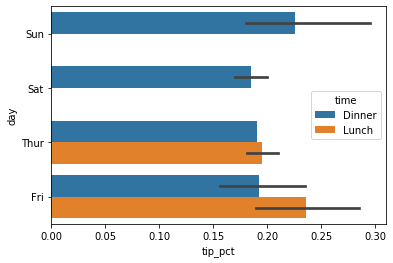

In [33]:
# La misma gráfica, ahora con más categorías (hue option)
# La orientación tiene que correponder al tipo de datos (prueba con orient='v')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## Histogramas y gráficas de densidad

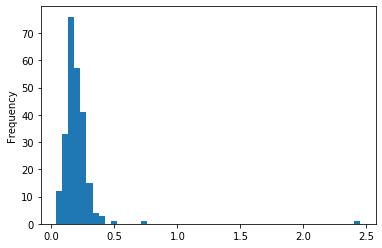

In [34]:
# Para variables discretas
tips['tip_pct'].plot.hist(bins=50)

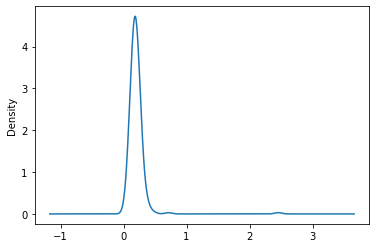

In [35]:
# Para variables continuas (o aproximaciones continuas de discretas)
tips['tip_pct'].plot.density()

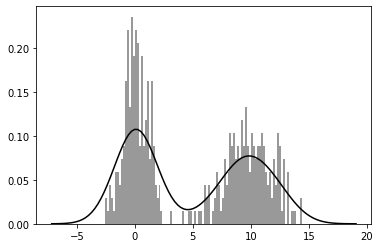

In [36]:
# Distribución binomial
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

# distplot muestra histograma y gráfico de estimación de densidad
sns.distplot(values, bins=100, color='k')

## Gráficas de dispersión

In [37]:
# Cargamos datos
macro = pd.read_csv('../examples/macrodata.csv')
# Selección de columnas (pasamos una lista)
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
# Diferencias de logaritmos
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

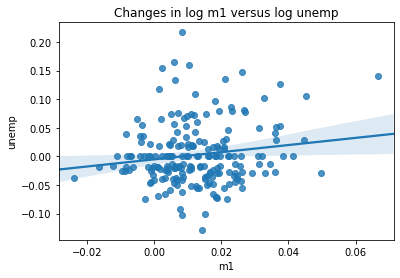

In [38]:
# regplot realiza una gráfica de dispersión y una regresión lineal
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log m1 versus log unemp')

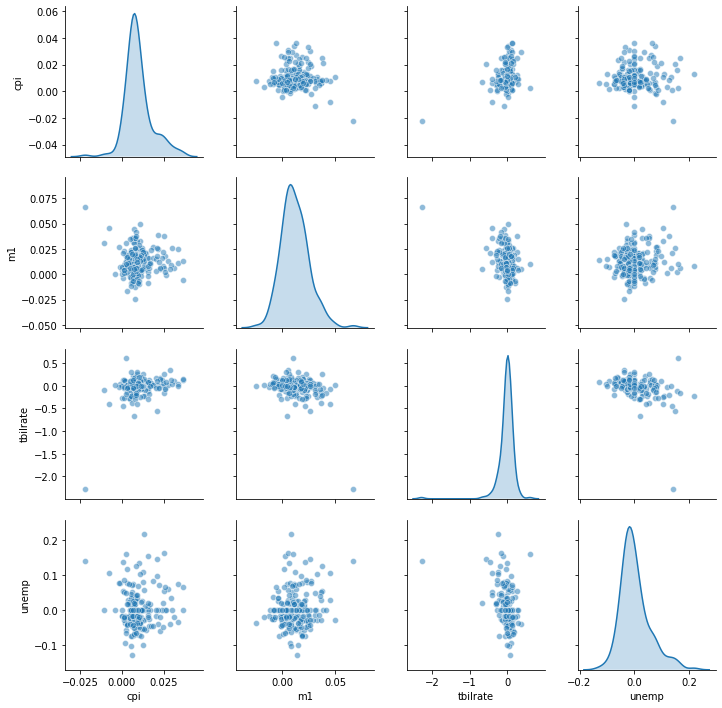

In [39]:
# Podemos hacer todo un análisis de correlación al instante
# Nótese el paso de opciones con plot_kws = {}
# La opción 'kde' realiza una gráfica de densidad
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.5})

## Datos categóricos

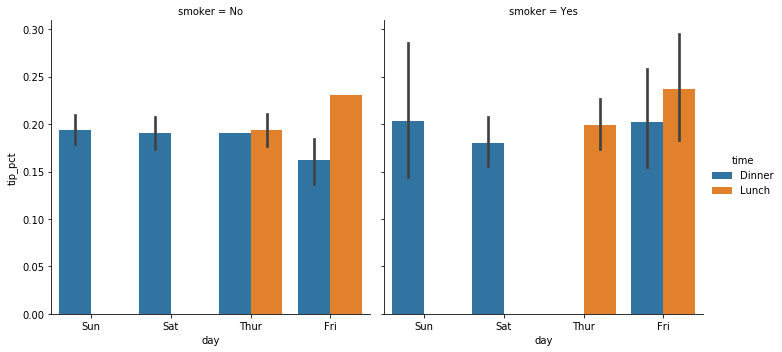

In [40]:
# Estadísticas sobre propinas por día y hora
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

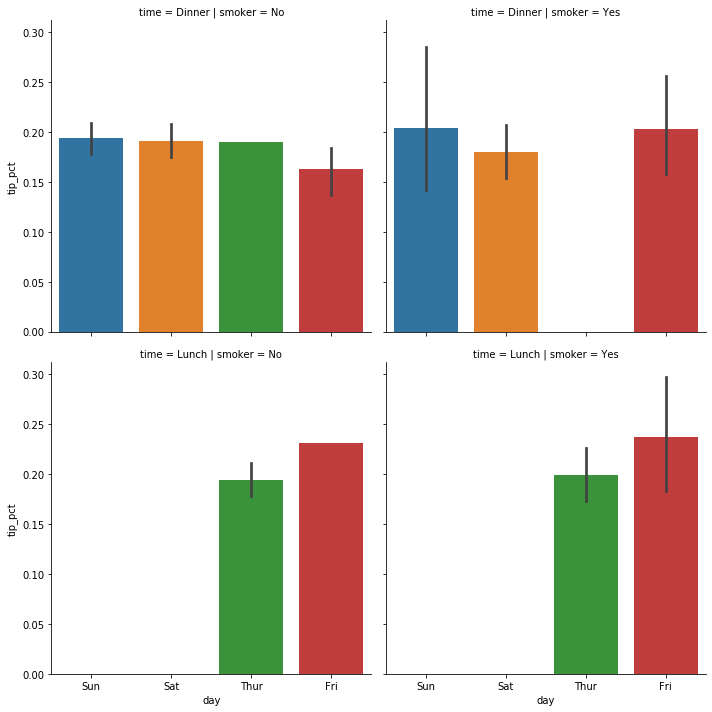

In [41]:
# Podemos abstenernos de usar la opción hue y tener
# gráficos para cada combinación de atributos
sns.catplot(x='day', y='tip_pct', row='time',
           col='smoker', kind='bar',
           data=tips[tips.tip_pct < 1])

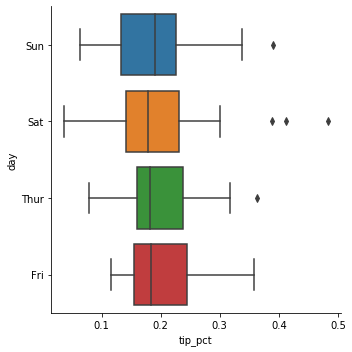

In [42]:
# GRÁFICOS DE CAJA
sns.catplot(x='tip_pct', y='day', kind='box',
              data=tips[tips.tip_pct < 0.5])